# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('Covid_Data_GradientCrescent/two/train')
DATASET_PATH  = 'Covid_Data_GradientCrescent/two/train'
TEST_DIR =  'Covid_Data_GradientCrescent/two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 15  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


/Applications/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


#### [10 points] Build Model of SGD+momentum+nesterov optimizer Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
from tensorflow.keras import models, layers, optimizers

vgg16 = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))

model_sgd = tf.keras.models.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation="relu", name='dense_feature'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_sgd.compile(loss="binary_crossentropy",
              optimizer=optimizers.SGD(lr=LEARNING_RATE, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

model_sgd.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
____________________________________________

#### [5 points] Train Model of SGD+momentum+nesterov optimizer Model

In [42]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

import time
start_time = time.time()

output = model_sgd.fit(train_batches,
                 validation_data = valid_batches,
                 validation_steps = STEP_SIZE_VALID,
                 batch_size = BATCH_SIZE,
                 steps_per_epoch =STEP_SIZE_TRAIN,
                 epochs= NUM_EPOCHS)

end_time = time.time()
print(f"The execution time is: {end_time-start_time} seconds")

7
2


/Applications/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Applications/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
6/6 [==============================] - 71s 12s/step - loss: 0.8278 - accuracy: 0.5169 - val_loss: 0.6528 - val_accuracy: 0.6000
Epoch 2/40
6/6 [==============================] - 69s 12s/step - loss: 0.7704 - accuracy: 0.5169 - val_loss: 0.5584 - val_accuracy: 1.0000
Epoch 3/40
6/6 [==============================] - 75s 13s/step - loss: 0.5990 - accuracy: 0.7191 - val_loss: 0.3947 - val_accuracy: 0.8000
Epoch 4/40
6/6 [==============================] - 68s 11s/step - loss: 0.4543 - accuracy: 0.7416 - val_loss: 0.2879 - val_accuracy: 0.9333
Epoch 5/40
6/6 [==============================] - 70s 12s/step - loss: 0.3854 - accuracy: 0.8202 - val_loss: 0.0392 - val_accuracy: 1.0000
Epoch 6/40
6/6 [==============================] - 70s 12s/step - loss: 0.2468 - accuracy: 0.9000 - val_loss: 0.1442 - val_accuracy: 0.9333
Epoch 7/40
6/6 [==============================] - 70s 12s/step - loss: 0.1787 - accuracy: 0.9333 - val_loss: 0.1176 - val_accuracy: 0.9333
Epoch 8/40
6/6 [===========

In [43]:
model_sgd.save('SGD_Binary.h5')

#### [5 points] Plot Accuracy and Loss During Training of SGD+momentum+nesterov optimizer Model

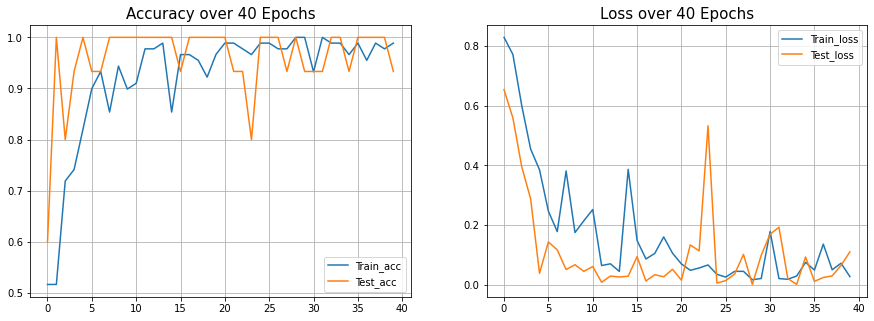

In [44]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(output, epochs):
    training_accuracy = output.history['accuracy']
    training_loss = output.history['loss']
    validation_accuracy = output.history['val_accuracy']
    validation_loss = output.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(0,NUM_EPOCHS), training_accuracy[:], label='Train_acc')
    plt.plot(range(0,NUM_EPOCHS), validation_accuracy[:], label='Test_acc')
    plt.title('Accuracy over ' + str(NUM_EPOCHS) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(0,NUM_EPOCHS), training_loss[:], label='Train_loss')
    plt.plot(range(0,NUM_EPOCHS), validation_loss[:], label='Test_loss')
    plt.title('Loss over ' + str(NUM_EPOCHS) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_accuracy_loss(output, NUM_EPOCHS)

#### Plot Test Results of SGD+momentum+nesterov optimizer Model

Found 18 images belonging to 2 classes.
18/18 [==============================] - 5s 259ms/step
covid/nejmoa2001191_f3-PA.jpeg


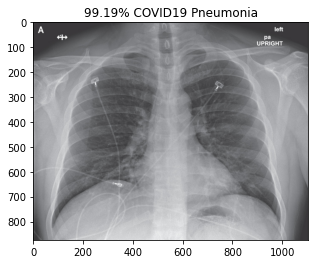

covid/nejmoa2001191_f4.jpeg


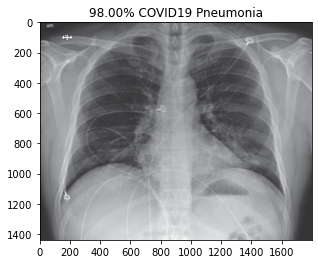

covid/nejmoa2001191_f5-PA.jpeg


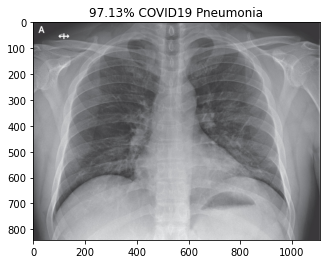

covid/radiol.2020200490.fig3.jpeg


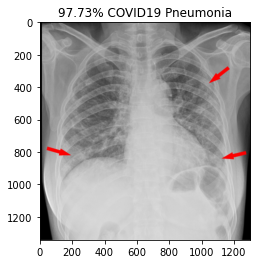

covid/ryct.2020200028.fig1a.jpeg


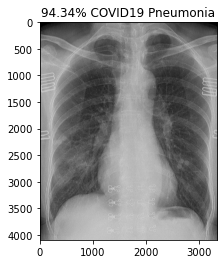

covid/ryct.2020200034.fig2.jpeg


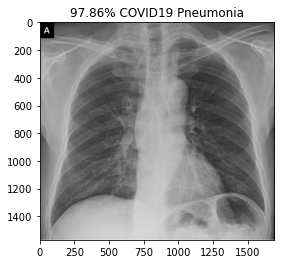

covid/ryct.2020200034.fig5-day0.jpeg


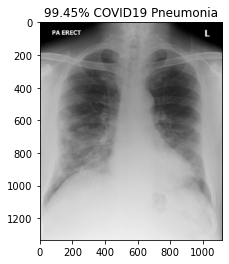

covid/ryct.2020200034.fig5-day4.jpeg


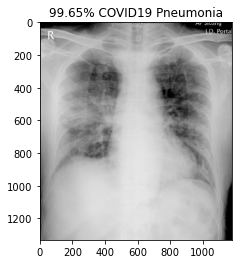

covid/ryct.2020200034.fig5-day7.jpeg


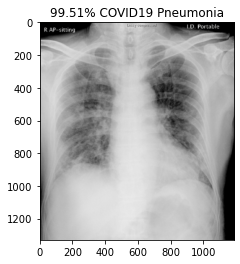

normal/NORMAL2-IM-1385-0001.jpeg


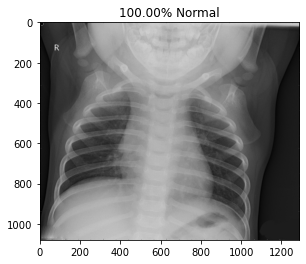

normal/NORMAL2-IM-1396-0001.jpeg


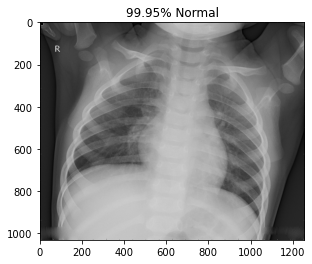

normal/NORMAL2-IM-1400-0001.jpeg


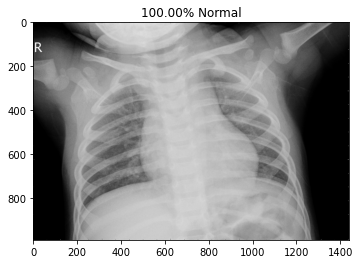

normal/NORMAL2-IM-1401-0001.jpeg


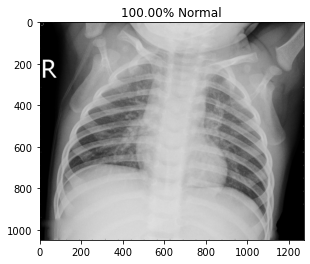

normal/NORMAL2-IM-1406-0001.jpeg


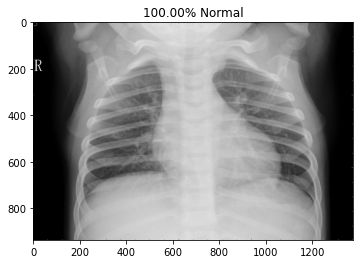

normal/NORMAL2-IM-1412-0001.jpeg


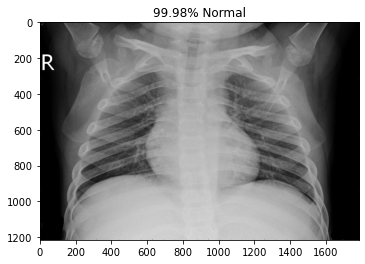

normal/NORMAL2-IM-1419-0001.jpeg


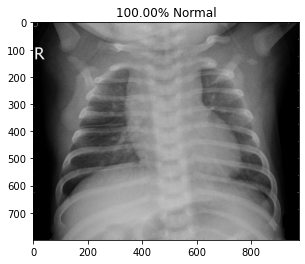

normal/NORMAL2-IM-1422-0001.jpeg


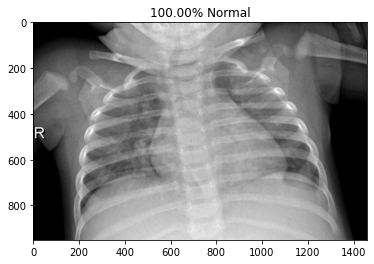

normal/NORMAL2-IM-1423-0001.jpeg


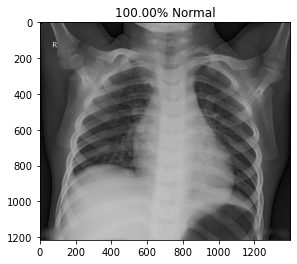

In [11]:
import matplotlib.image as mpimg
model_sgd = keras.models.load_model('SGD_Binary.h5')

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")
eval_generator.reset()
pred = model_sgd.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

#### Testing Model of SGD+momentum+nesterov optimizer Model

In [12]:
x = model_sgd.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

18/18 [==============================] - 6s 317ms/step - loss: 0.0097 - accuracy: 1.0000
Test loss: 0.009725017473101616
Test accuracy: 1.0


## [10 points] TSNE Plot of SGD+momentum+nesterov optimizer Model
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 130 images belonging to 2 classes.
130/130 [==============================] - 37s 284ms/step


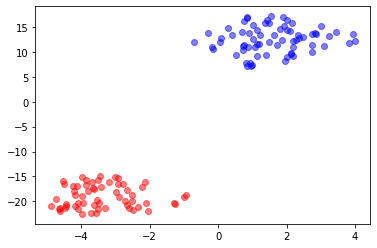

In [13]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from tensorflow import keras

model_sgd = keras.models.load_model('SGD_Binary.h5')

intermediate_layer_model = models.Model(inputs=model_sgd.input,
                                        outputs=model_sgd.get_layer('dense_feature').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

tsne_data_generator.reset()
activations = intermediate_layer_model.predict_generator(tsne_data_generator, 130, verbose=1)
tsne = TSNE(random_state=42, n_components=2).fit_transform(activations)

for index, tsne in enumerate(tsne):
    if tsne_data_generator.filenames[index][:5] == 'covid':
        plt.scatter(tsne[0], tsne[1], color = 'r', alpha=0.5)
    else:
        plt.scatter(tsne[0], tsne[1], color = 'b', alpha=0.5)
plt.show()

## Classification Report and Confusion Matrix of SGD+momentum+nesterov optimizer Model

In [61]:
train_batches.class_indices

{'covid': 0, 'normal': 1}

              precision    recall  f1-score   support

       covid       1.00      1.00      1.00         9
      normal       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



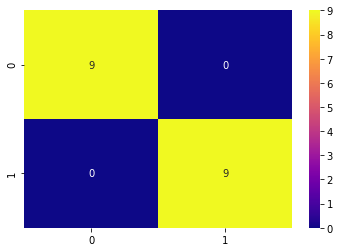

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import os

model_sgd = tf.keras.models.load_model('SGD_Binary.h5')

y_actual = []
y_test = []

for i in os.listdir('Covid_Data_GradientCrescent/two/test/covid/'):
    y_actual.append(0)
    
for i in os.listdir('Covid_Data_GradientCrescent/two/test/normal/'):
    y_actual.append(1)

y_actual = np.array(y_actual)
y_test = np.array((model_sgd.predict_generator(eval_generator) > 0.5).astype("int32"))

cm = confusion_matrix(y_actual, y_test)
sns.heatmap(cm, cmap='plasma', annot=True)

cr = classification_report(y_actual, y_test, target_names=['covid', 'normal'])
print(cr)

## ----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x---x---x---

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('Covid_Data_GradientCrescent/two/train')
DATASET_PATH  = 'Covid_Data_GradientCrescent/two/train'
TEST_DIR =  'Covid_Data_GradientCrescent/two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


/Applications/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


## Build Model of Adagrad optimizer Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
from tensorflow.keras import models, layers, optimizers

vgg16 = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))

model_adagrad = tf.keras.models.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu", name='dense_feature'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_adagrad.compile(loss="binary_crossentropy",
              optimizer=optimizers.Adagrad(lr=LEARNING_RATE),
              metrics=['accuracy'])

model_adagrad.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               6422784   
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


#### Train Model of Adagrad optimizer Model

In [5]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

import time
start_time = time.time()

output = model_adagrad.fit(train_batches,
                 validation_data = valid_batches,
                 validation_steps = STEP_SIZE_VALID,
                 batch_size = BATCH_SIZE,
                 steps_per_epoch =STEP_SIZE_TRAIN,
                 epochs= NUM_EPOCHS)

end_time = time.time()
print(f"The execution time is: {end_time-start_time} seconds")

11
3


/Applications/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Applications/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
10/10 [==============================] - 108s 11s/step - loss: 0.9287 - accuracy: 0.5319 - val_loss: 0.7551 - val_accuracy: 0.5500
Epoch 2/40
10/10 [==============================] - 99s 10s/step - loss: 0.6246 - accuracy: 0.6596 - val_loss: 0.5474 - val_accuracy: 0.5500
Epoch 3/40
10/10 [==============================] - 107s 11s/step - loss: 0.7880 - accuracy: 0.5532 - val_loss: 0.5294 - val_accuracy: 0.9000
Epoch 4/40
10/10 [==============================] - 127s 13s/step - loss: 0.5703 - accuracy: 0.6702 - val_loss: 0.3300 - val_accuracy: 0.9000
Epoch 5/40
10/10 [==============================] - 101s 10s/step - loss: 0.4747 - accuracy: 0.8298 - val_loss: 0.5115 - val_accuracy: 0.7000
Epoch 6/40
10/10 [==============================] - 96s 10s/step - loss: 0.3880 - accuracy: 0.8617 - val_loss: 0.1874 - val_accuracy: 0.9500
Epoch 7/40
10/10 [==============================] - 93s 9s/step - loss: 0.3600 - accuracy: 0.8298 - val_loss: 0.1263 - val_accuracy: 1.0000
Epoch 8/40

In [21]:
model_adagrad.save('Adagrad_Binary.h5')

#### Plot Accuracy and Loss During Training of Adagrad optimizer Model

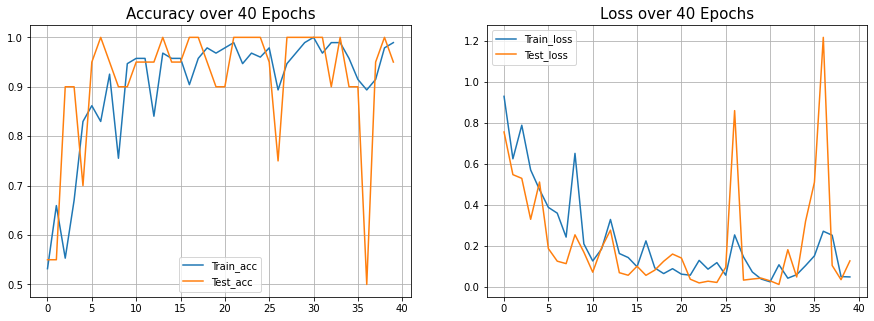

In [7]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(output, epochs):
    training_accuracy = output.history['accuracy']
    training_loss = output.history['loss']
    validation_accuracy = output.history['val_accuracy']
    validation_loss = output.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(0,NUM_EPOCHS), training_accuracy[:], label='Train_acc')
    plt.plot(range(0,NUM_EPOCHS), validation_accuracy[:], label='Test_acc')
    plt.title('Accuracy over ' + str(NUM_EPOCHS) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(0,NUM_EPOCHS), training_loss[:], label='Train_loss')
    plt.plot(range(0,NUM_EPOCHS), validation_loss[:], label='Test_loss')
    plt.title('Loss over ' + str(NUM_EPOCHS) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_accuracy_loss(output, NUM_EPOCHS)

#### Plot Test Results of Adagrad optimizer Model

Found 18 images belonging to 2 classes.
18/18 [==============================] - 7s 375ms/step
covid/nejmoa2001191_f3-PA.jpeg


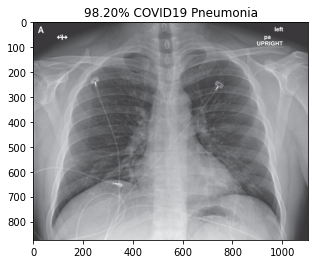

covid/nejmoa2001191_f4.jpeg


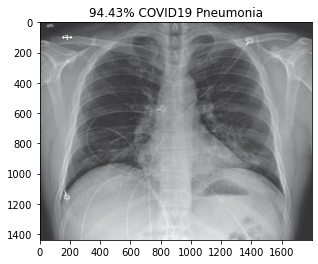

covid/nejmoa2001191_f5-PA.jpeg


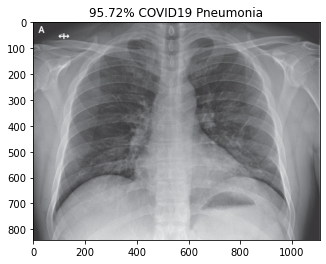

covid/radiol.2020200490.fig3.jpeg


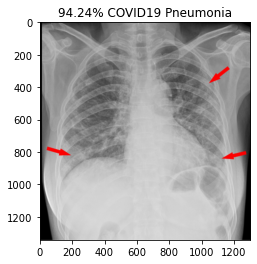

covid/ryct.2020200028.fig1a.jpeg


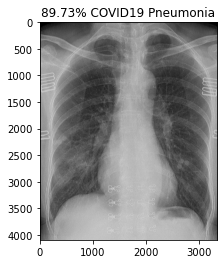

covid/ryct.2020200034.fig2.jpeg


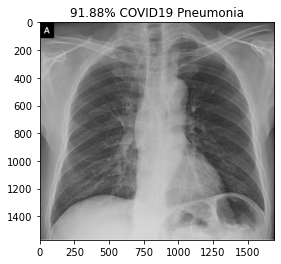

covid/ryct.2020200034.fig5-day0.jpeg


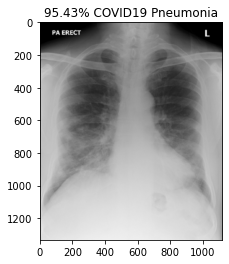

covid/ryct.2020200034.fig5-day4.jpeg


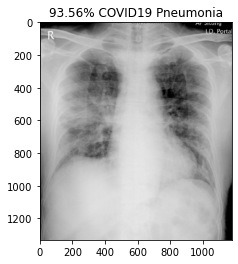

covid/ryct.2020200034.fig5-day7.jpeg


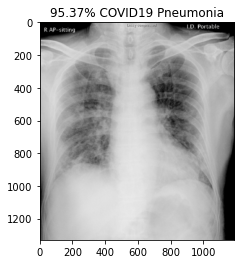

normal/NORMAL2-IM-1385-0001.jpeg


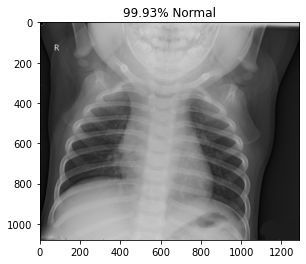

normal/NORMAL2-IM-1396-0001.jpeg


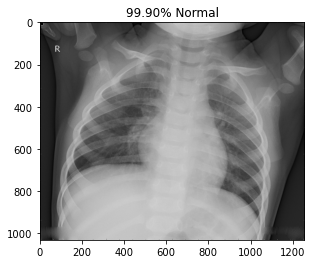

normal/NORMAL2-IM-1400-0001.jpeg


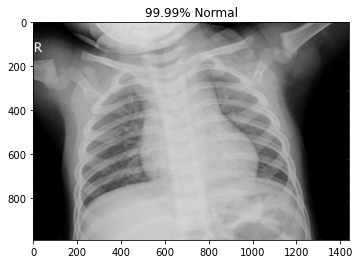

normal/NORMAL2-IM-1401-0001.jpeg


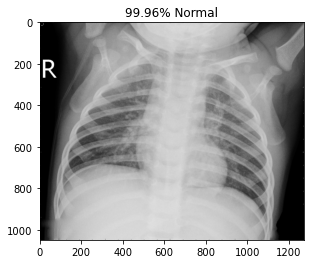

normal/NORMAL2-IM-1406-0001.jpeg


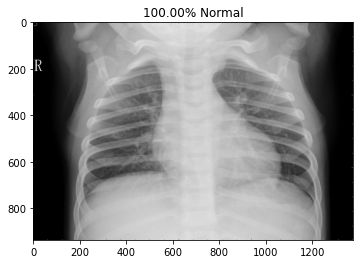

normal/NORMAL2-IM-1412-0001.jpeg


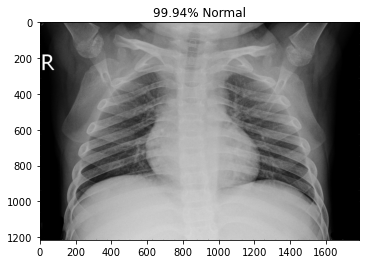

normal/NORMAL2-IM-1419-0001.jpeg


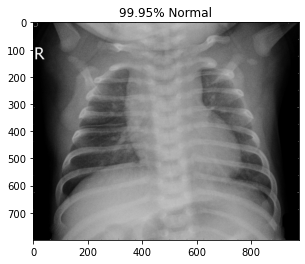

normal/NORMAL2-IM-1422-0001.jpeg


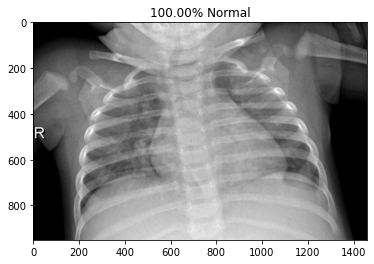

normal/NORMAL2-IM-1423-0001.jpeg


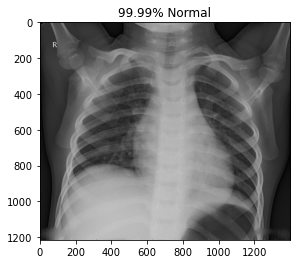

In [14]:
import matplotlib.image as mpimg
model_adagrad = keras.models.load_model('Adagrad_Binary.h5')

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")
eval_generator.reset()
pred = model_adagrad.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

#### Testing Model of Adagrad optimizer Model

In [15]:
x = model_adagrad.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

18/18 [==============================] - 9s 514ms/step - loss: 0.0298 - accuracy: 1.0000
Test loss: 0.029754221439361572
Test accuracy: 1.0


## TSNE Plot of Adagrad optimizer Model
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 130 images belonging to 2 classes.
130/130 [==============================] - 35s 272ms/step


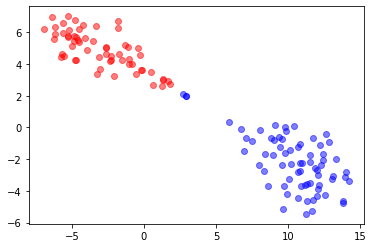

In [16]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from tensorflow import keras

intermediate_layer_model = models.Model(inputs=model_adagrad.input,
                                        outputs=model_adagrad.get_layer('dense_feature').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

tsne_data_generator.reset()
activations = intermediate_layer_model.predict_generator(tsne_data_generator, 130, verbose=1)
tsne = TSNE(random_state=42, n_components=2).fit_transform(activations)

for index, tsne in enumerate(tsne):
    if tsne_data_generator.filenames[index][:5] == 'covid':
        plt.scatter(tsne[0], tsne[1], color = 'r', alpha=0.5)
    else:
        plt.scatter(tsne[0], tsne[1], color = 'b', alpha=0.5)
plt.show()

## Classification Report and Confusion Matrix of Adagrad optimizer Model

In [60]:
train_batches.class_indices

{'covid': 0, 'normal': 1}

              precision    recall  f1-score   support

       covid       1.00      1.00      1.00         9
      normal       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



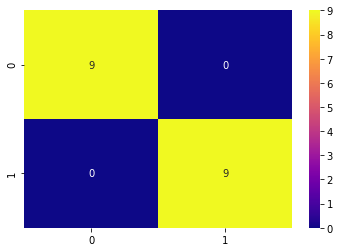

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import os

y_actual = []
y_test = []

model_adagrad = tf.keras.models.load_model('Adagrad_Binary.h5')

for i in os.listdir('Covid_Data_GradientCrescent/two/test/covid/'):
    y_actual.append(0)

for i in os.listdir('Covid_Data_GradientCrescent/two/test/normal/'):
    y_actual.append(1)
 

y_actual = np.array(y_actual)
y_test = np.array((model_adagrad.predict_generator(eval_generator) > 0.5).astype("int32"))

cm = confusion_matrix(y_actual, y_test)
sns.heatmap(cm, cmap='plasma', annot=True)

cr = classification_report(y_actual, y_test, target_names=['covid', 'normal'])
print(cr)